In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42) 
tf.random.set_seed(42)

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape


(60000, 28, 28)

In [17]:
X_valid = X_train_full[:5000] / 255.


In [18]:
y_valid = y_train_full[:5000]


In [19]:
X_train = X_train_full[5000:] / 255.


In [20]:
y_train = y_train_full[5000:]

In [22]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [23]:
X_test = X_test / 255.


In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


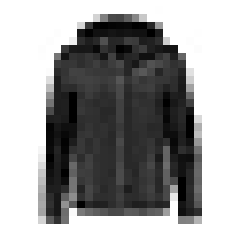

In [33]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

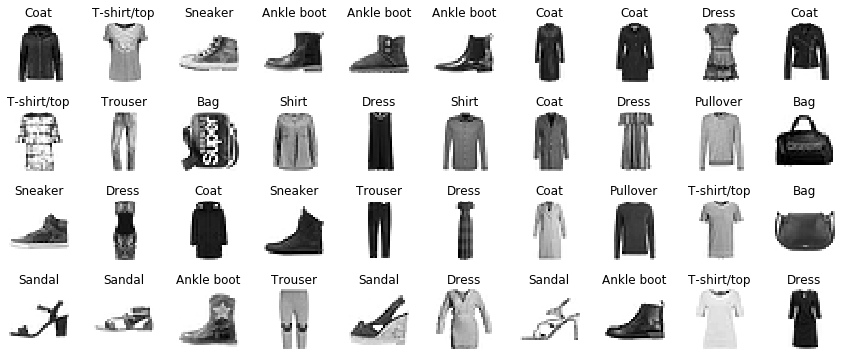

In [34]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [37]:
keras.backend.clear_session()

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [40]:
model.layers

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


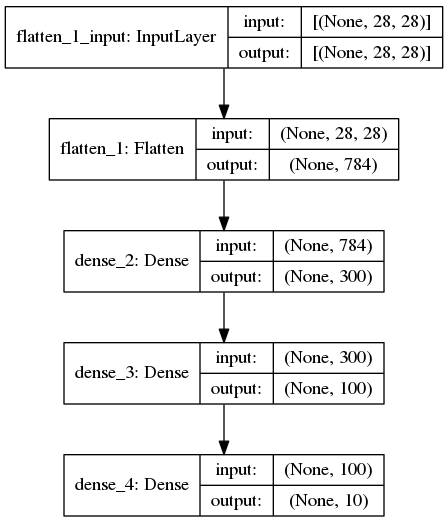

In [43]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [45]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [47]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [53]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8321 - val_loss: 0.4584 - val_accuracy: 0.8410
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4396 - accuracy: 0.8464 - val_loss: 0.4066 - val_accuracy: 0.8624
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4120 - accuracy: 0.8553 - val_loss: 0.4958 - val_accuracy: 0.8144
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3920 - accuracy: 0.8624 - val_loss: 0.3769 - val_accuracy: 0.8698
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8673 - val_loss: 0.3629 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3616 - accuracy: 0.8720 - val_loss: 0.3589 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3512 - accuracy: 0.8752 - val_loss: 0.3557 - val_accuracy

In [54]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Let us print the name of the first hidden layer:



In [55]:
hidden1 = model.layers[1]
print(hidden1.name)

dense_2


In [56]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02428108 -0.0088708  -0.02189048 ... -0.02774961  0.03858247
  -0.06890561]
 [ 0.00457972 -0.0311199  -0.0586676  ...  0.00592304 -0.02764409
  -0.04163948]
 [-0.06297147 -0.06924662  0.07103769 ... -0.04249476  0.07120615
  -0.07309636]
 ...
 [-0.01685431  0.02097483 -0.05393354 ...  0.00069006  0.00017271
   0.06353716]
 [ 0.07326307 -0.07066491  0.0704379  ... -0.00093324 -0.00173278
   0.03171334]
 [-0.06236347  0.01551564 -0.02585173 ... -0.00459726  0.00216933
  -0.0673244 ]]
[ 1.75723314e-01  4.59812619e-02 -8.48225376e-04 -1.10328399e-01
  2.01292615e-03  9.91161838e-02  4.88987043e-02 -7.53158750e-03
 -2.53376886e-02  6.28916025e-02 -2.00501597e-03 -1.56039288e-02
  9.82318074e-02  2.90360861e-03  1.69043481e-01  8.67602602e-02
 -3.22076343e-02  5.02255820e-02  9.19466242e-02 -1.33116156e-01
  1.12093762e-01  1.44984186e-01 -2.54315813e-03  2.91844569e-02
  5.87673895e-02  5.24217412e-02 -5.85373072e-03  2.13923052e-01
  1.55161947e-01  1.40972137e-02  1.053105

Let us use get_weights() function to see the trained weights and biases of the hidden1.

Let us visualize the model training history. Here, history.history is a dictionary containing information about the accuracy and loss measures through the epochs.

Let us store this dictionary as a pandas dataframe and plot the values.

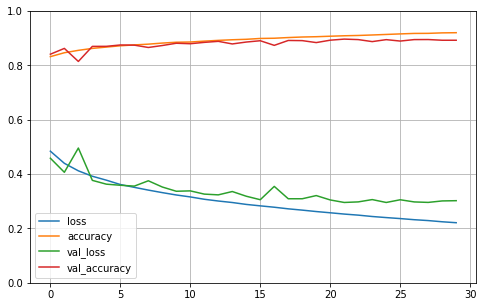

In [57]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [61]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8825


[0.3366309404373169, 0.8824999928474426]

In [62]:
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])

[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


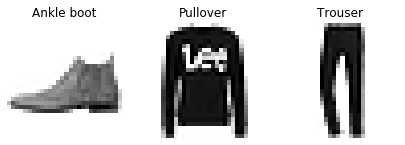

In [63]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()